**Rainfall Weather Forecasting**

**Project Description**

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

1. **Problem Statement:**

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


##**Dataset Description:**

**Number of columns: 23**

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day.

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am.

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".




**Dataset Link-**

•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
rainfall_url='https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv'
df_Rain_Forecast=pd.read_csv(rainfall_url)
df_Rain_Forecast.head()

HTTPError: HTTP Error 404: Not Found

**Data Exploration :**

In [ ]:
df_Rain_Forecast.shape

In [ ]:
df_Rain_Forecast.info()


In [ ]:
df_Rain_Forecast.dtypes

In [ ]:
#Find the type of data

fig,ax=plt.subplots(figsize=(20,10))
df_Rain_Forecast.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax,shadow=True)
plt.show()

In [ ]:
df_Rain_Forecast.isnull().sum()

In [ ]:
rain_today_count = df_Rain_Forecast['RainToday'].value_counts()
rain_tomorrow_count = df_Rain_Forecast['RainTomorrow'].value_counts()
print(rain_today_count)
print(rain_tomorrow_count)

In [ ]:
#Here ,I can see few data is in object so needs to convert it into binary
RainToday_map = {'Yes': 1, 'No': 0}
RainTomorrow_map = {'Yes': 1, 'No': 0}
df_Rain_Forecast['RainToday'] = df_Rain_Forecast['RainToday'].map(RainToday_map)
df_Rain_Forecast['RainTomorrow'] = df_Rain_Forecast['RainTomorrow'].map(RainTomorrow_map)


In [ ]:
df_Rain_Forecast.describe()

The counts for each column are different, indicating that there are missing values in some columns.

In [ ]:
missed_data_value = df_Rain_Forecast.isnull().sum()
percent_missing = df_Rain_Forecast.isnull().sum() * 100 / len(df_Rain_Forecast)
print('missed_data_value: \n',missed_data_value, 'percent_missing : \n', percent_missing)

Here we can see the features :
Evaporation      41.685460,

Sunshine         47.

Cloud9am         28.735905

Cloud3pm         29.139466406528

have high percentage data loss /Data missing %

In [ ]:
#handling class imblance for rainfall predection

from sklearn.utils import resample

# Separate majority and minority classes
df_Rain_Forecast_majority = df_Rain_Forecast[df_Rain_Forecast.RainTomorrow==0]
df_Rain_Forecast_minority = df_Rain_Forecast[df_Rain_Forecast.RainTomorrow==1]

# Upsample minority class
df_Rain_Forecast_minority_upsampled = resample(df_Rain_Forecast_minority,
replace=True,     # sample with replacement
n_samples=len(df_Rain_Forecast_majority),  # match number in majority class
random_state=42
)

# Combine majority class with upsampled minority class
df_Rain_Forecast_upsampled = pd.concat([df_Rain_Forecast_majority, df_Rain_Forecast_minority_upsampled])

# Display new class counts
df_Rain_Forecast_upsampled.RainTomorrow.value_counts()

print(df_Rain_Forecast_upsampled.shape)


In [ ]:
#Find the type of data

fig,ax=plt.subplots(figsize=(20,10))
df_Rain_Forecast_upsampled.dtypes.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',ax=ax,shadow=True)
plt.show()

In [ ]:
#fig,ax=plt.subplots(figsize=(20,10))
df_Rain_Forecast_upsampled

In [ ]:
oversmapled = df_Rain_Forecast_upsampled.dropna()
total_val = oversmapled.isnull().sum().sort_values(ascending=False)
percentage = (oversmapled.isnull().sum()/len(oversmapled.isnull())*100).sort_values(ascending=False)
missing_data = pd.concat([total_val, percentage], axis=1, keys=['Total', 'Percentage'])
missing_data.head(20)

In [ ]:
oversmapled.head()
print(oversmapled.shape)
#oversmapled = df_Rain_Forecast.dropna()
#total_val = oversmapled.isnull().sum().sort_values(ascending=False)
#percentage = (oversmapled.isnull().sum()/len(oversmapled.isnull())*100).sort_values(ascending=False)
#missing_data = pd.concat([total_val, percentage], axis=1, keys=['Total', 'Percentage'])
#missing_data.head(20)

In [ ]:
#missing data pattern in Training Data
import seaborn as sns
sns.heatmap(df_Rain_Forecast_upsampled.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(df_Rain_Forecast_upsampled.shape)

In [ ]:
#missing data pattern in Training Data old data
import seaborn as sns
sns.heatmap(df_Rain_Forecast.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print(df_Rain_Forecast.shape)

Here we can observer highly missing values like Evaporation,sunshine,Cloud9am and cloud3pm .

And we can observer the above four features have lessthan 50 per cent missing data .so insted of rejection them completly,we'll consider them in our model with proper imputation


**Imputation and transformation**


we will impute the ctagorical columns with mode,and then we will use the label encoder to convert them to numeric numbers

In [ ]:
oversmapled.select_dtypes(include=['object']).columns

In [ ]:
#impute catagerical variables with mode
oversmapled['WindGustDir'] = oversmapled['WindGustDir'].fillna(oversmapled['WindGustDir'].mode()[0])
oversmapled['WindDir9am'] = oversmapled['WindDir9am'].fillna(oversmapled['WindDir9am'].mode()[0])
oversmapled['WindDir3pm'] = oversmapled['WindDir3pm'].fillna(oversmapled['WindDir3pm'].mode()[0])
oversmapled['Date'] = oversmapled['Date'].fillna(oversmapled['Date'].mode()[0])
oversmapled['Location'] = oversmapled['Location'].fillna(oversmapled['Location'].mode()[0])

In [ ]:
#convert catagorical to numeric with label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in oversmapled.select_dtypes(include=['object']).columns:
    oversmapled[i] = le.fit_transform(oversmapled[i])

oversmapled


In [ ]:
oversmapled.head()

In [ ]:
oversmapled.dtypes

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = oversmapled.copy()
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(MiceImputed)
MiceImputed.head()
#

In [ ]:
#detecting Outliers with IQR

Q1 = oversmapled.quantile(0.25)
Q3 = oversmapled.quantile(0.75)
IQR = Q3 - Q1
print('IQR \b', IQR)

#Defome pouliers detectionthresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower_bound", lower_bound)
print("upper_bound",upper_bound)

#define outliers
outliers = ((oversmapled < lower_bound) | (oversmapled > upper_bound))
print('outliers',outliers)

In [ ]:
oversmapled.shape

In [ ]:
#removing outliers from the dataset

MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

Aster removing the outliers the dataset has the form of ( 2297,23) and 1493 got free .

now we are going to check multicollinearity,that is to say if a character is strolgly correlated with another

##Correlation HeatMap 1

In [ ]:
import seaborn as sns
corr = MiceImputed.corr()
#sns.heatmap(corr,annot=True)
fig,ax=plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

In [ ]:
#Correlation heatmap 2 with small change in Display
import seaborn as sns
corr = MiceImputed.corr()
#sns.heatmap(corr,annot=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax=plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
sns.heatmap(mask = mask,data=corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

Here,  we can see the features like temp3PM and temp9am  have strong correlation with MinTemp,MaxTemp .As well as we can see the other features like Evaporation,sunnshine have positive correlartion  i.e
Positive High correlation :
Temp3pm vs MinTemp = (0.74).

Temp3PM vs MaxTemp = (0.98)

temp9am vs MinTemp = (0.86)
temp9am vs MaxTemp = (0.88)

Evaporation vs MaxTemp = (0.71)

Negitive correlation :             

Presure9am vs Temp9am : (-0.64)
presure9am vs Temp3PM : (-0.52)

presure3pm vs temp9am : (-0.66)
presure3pm vs temp3pm : (-0.61)


However . we can delve deeper into the pairwise correlation between these highly correlated characterstics  by examining the following pair diagram .

each of the paired plots shows very clearly distinct clusters of rainTomorrow;s "Yes" and 'No clusters

There is very minimal overlap between them








maxtemp vs MinTemp have strong correlation (0.76)
pressure9h and pressure3h  have very strong correlation (0.97)



In [ ]:
sns.pairplot(data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm','Temp3pm','Temp9am','Evaporation' ),hue='RainTomorrow')

##**Feature selection for Rainfall Predection**


I'm using filter method and wrapper method for feature selection to train our rainfall predection model



###**Just for Note: **


**Filter Methods**
**Filter methods involve evaluating the relevance of features based on certain criteria, independent of any machine learning algorithm. They use statistical techniques to assess the importance of each feature before the actual model training. Here are some common filter methods:**

**Statistical Tests:** Tests like chi-squared, ANOVA F-statistic, and Pearson correlation can be used to assess the relationship between each feature and the target variable.

**Information Gain:** Measures how much information a feature provides about the class labels.

**Variance Threshold**: Features with low variance (i.e., little to no change in values) are often removed, assuming they carry less information.

**Mutual Information:** Quantifies the amount of information obtained about one variable through the other.

##Advantages:

**Fast**: Generally faster as they do not involve training models.
Simple: Easy to understand and implement.
Scalable: Can handle large datasets with many features.


**Disadvantages**:

**Independent of model**: May not always choose the best features for a particular model.
Limited context: Evaluates features in isolation rather than considering their interactions.
Wrapper Methods
Wrapper methods involve selecting features by evaluating their performance with a specific machine learning algorithm. They use the model's performance to assess feature subsets, making them more tailored to the specific algorithm used. Here are some common wrapper methods:

**Forward Selection:** Starts with no features and adds one feature at a time that improves the model's performance until no further improvement is observed.

**Backward Elimination:** Starts with all features and removes the least significant feature at each step, assessing performance at each stage.

Recursive Feature Elimination (RFE): Iteratively fits the model, ranks the features, and eliminates the least important ones.

**Advantages:**

Model-specific: Considers interactions between features and their impact on the model's performance.
Potentially more accurate: Can lead to better feature sets as they are evaluated in the context of the chosen model.


**Disadvantages:**

Computationally expensive: Requires multiple model trainings, which can be time-consuming for large datasets.
Overfitting risk: May lead to overfitting if the feature set is too optimized for the training data.

In [ ]:
#Standardizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)

#Feature Importance using Filter Method(Chi-square)

In [ ]:
#Feature Importance using Filter Method(Chi-square)

from  sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = modified_data.loc[:,modified_data.columns != 'RainTomorrow']
y = modified_data['RainTomorrow']

selector_chi2 = SelectKBest(chi2, k=10)
selector_chi2.fit(X, y)

X_new = selector_chi2.transform(X)
X_new.shape

print(X.columns[selector_chi2.get_support(indices=True)])


### **Selection of features by wrapping method (Random forest )**

In [ ]:

from sklearn.ensemble import RandomForestClassifier  as rf
from sklearn.feature_selection import SelectFromModel

#prepare the feature matrix and target variable
X_rf = MiceImputed.drop('RainTomorrow', axis=1)

y_rf = MiceImputed['RainTomorrow']

#Initialize and fit the RandomForest Classifier

rf_model = rf(n_estimators=100, random_state=42)
rf_model.fit(X_rf, y_rf)

#Use selectFormModel with fitted RFC

rf_selector = SelectFromModel(rf_model,prefit=True)
support = rf_selector.get_support()
features = X_rf.loc[:,support].columns.tolist()

print("Selected Feature:",features)
print('Feature Importences:', rf_model.feature_importances_)

constant_features = [col for col in X_rf.columns if X_rf[col].nunique() <= 1]
print("Constant features:", constant_features)


In [ ]:
#Due to null values in selected values ,Below is just for testing perpose
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import pandas as pd

#Prepare the feature matrix and target variable
X_rf = MiceImputed.drop('RainTomorrow', axis=1)
y_rf = MiceImputed['RainTomorrow']

#Check for constant columns
constant_features = [col for col in X_rf.columns if X_rf[col].nunique() <= 1]
print("Constant features:", constant_features)

#Check for missing values
missing_values = X_rf.isnull().sum()
print("Missing values:", missing_values[missing_values > 0])

#Encode categorical variables if necessary
X_rf_encoded = pd.get_dummies(X_rf)

#Initialize and fit the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_rf_encoded, y_rf)

#Check feature importances
importances = rf_model.feature_importances_
print("Feature importances from the model directly:", importances)

#Use SelectFromModel with the fitted RandomForestClassifier
rf_selector = SelectFromModel(rf_model, prefit=True)
support = rf_selector.get_support()
features = X_rf_encoded.columns[support].tolist()
print("Selected features:", features)


In [ ]:

print(MiceImputed.describe())
print(MiceImputed.info())
print(MiceImputed.head())

In [ ]:
missed_data_value = MiceImputed.isnull().sum()
percent_missing = MiceImputed.isnull().sum() * 100 / len(df_Rain_Forecast)
print('missed_data_value: \n',missed_data_value, 'percent_missing : \n', percent_missing)

In [ ]:
#Correlation heatmap 2 with small change in Display second time
import seaborn as sns
corr = MiceImputed.corr()
#sns.heatmap(corr,annot=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
fig,ax=plt.subplots(figsize=(20,15))
cmap = sns.diverging_palette(220, 15, as_cmap=True)
sns.heatmap(mask = mask,data=corr, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5,annot=True, cbar_kws={"shrink": .5})
plt.show()

**Again secont time correlation heatmap **

 we can see the features like temp3PM and temp9am have strong correlation with MinTemp,MaxTemp .As well as we can see the other features like Evaporation,sunnshine have positive correlartion i.e Positive High correlation : Temp3pm vs MinTemp = (0.74).

Temp3PM vs MaxTemp = (0.97)

temp9am vs MinTemp = (0.87) temp9am vs MaxTemp = (0.89)

Evaporation vs MaxTemp = (0.68)
Evaporation vs Team3pm = (0.66)
Evaporation vs Team9am = (0.66)

Maxtemp vs Mintemp also possitive correlation i.t(0.75)



Negitive correlation :

Presure9am vs Temp9am : (-0.39) presure9am vs Temp3PM : (-0.43)

presure3pm vs temp9am : (-0.66) presure3pm vs temp3pm : (-0.61)

sunshine vs RainTomorrow = (-0.52)


However . we can delve deeper into the pairwise correlation between these highly correlated characterstics by examining the following pair diagram .

each of the paired plots shows very clearly distinct clusters of rainTomorrow;s "Yes" and 'No clusters

There is very minimal overlap between them

maxtemp vs MinTemp have strong correlation (0.75) pressure9h and pressure3h have very strong correlation (0.96)

##Training the model

In [ ]:
#features= MiceImputed[['Location','MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustDir','WindGustSpeed','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','RainToday']]
features = MiceImputed.drop('RainTomorrow', axis=1)
target = MiceImputed['RainTomorrow']
print(features.shape)
print(target.shape)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score,roc_auc_score,cohen_kappa_score,confusion_matrix,classification_report,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import lightgbm as lgb
import xgboost as xgb
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier

from sklearn.metrics import precision_score,recall_score,f1_score
import time

from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier(),
    'XGBoost': xgb.XGBClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Random Forest': RandomForestClassifier(),
    'MLPClassifier': MLPClassifier()
    }


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:


def run_model(model,X_train,X_test,y_train,y_test, verbose=True):
  time_0 = time.time()
  if verbose ==False:
    model.fit(X_train,y_train)
  else:
    model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  roc_auc = roc_auc_score(y_test,y_pred)
  cohen_kappa = cohen_kappa_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test,y_pred)
  print('Model: ',model)
  print('Accuracy: ',accuracy)
  print('ROC_AUC: ',roc_auc)
  print('Cohen_Kappa: ',cohen_kappa)
  print('Precision: ',precision)
  print('Recall: ',recall)
  print('F1: ',f1)
  print('Training Completed')
  print('Time taken: ',time.time()-time_0)
  print('-----------------------------------------------------------------------------------------\n')

  return model

In [ ]:
#Plot roc_auc
plt.figure(figsize=(15,10))

for i, (name, model) in enumerate(models.items()):
  model = run_model(model,X_train,X_test,y_train,y_test)
  y_pred_proba = model.predict_proba(X_test)[:,1]
  fpr,tpr,thresholds = roc_curve(y_test,y_pred_proba)
  auc_score = roc_auc_score(y_test,y_pred_proba)
  plt.plot(fpr,tpr,label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0,1],[0,1], 'k--', color = 'blue')
plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()

In [ ]:
#LGBMClassifier
lgbmc_model = lgb.LGBMClassifier()
lgbmc_model = run_model(lgbmc_model,X_train,X_test,y_train,y_test)

probs0 = lgbmc_model.predict_proba(X_test)
probs1 = probs0[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)



In [ ]:
#xgb.XGBClassifier
xgbc_model = xgb.XGBClassifier()
xgbc_model = run_model(xgbc_model,X_train,X_test,y_train,y_test)

probs0 = xgbc_model.predict_proba(X_test)
probs1 = probs0[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)

In [ ]:
#LogisticRegression
LR_model = LogisticRegression()
LR_model = run_model(LR_model,X_train,X_test,y_train,y_test)

probs0 = LR_model.predict_proba(X_test)
probs1 = probs0[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)

In [ ]:
#DecisionTreeClassifier
DTC_model = DecisionTreeClassifier()
DTC_model = run_model(DTC_model,X_train,X_test,y_train,y_test)

probs0 = DTC_model.predict_proba(X_test)
probs1 = probs0[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)

In [ ]:
#RandomForestClassifier
RFC_model = RandomForestClassifier()
RFC_model = run_model(RFC_model,X_train,X_test,y_train,y_test)

probs0 = RFC_model.predict_proba(X_test)
probs1 = probs0[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)


In [ ]:
#GradientBoostingClassifier
GBC_model = GradientBoostingClassifier()
GBC_model = run_model(GBC_model,X_train,X_test,y_train,y_test)

probs0 = GBC_model.predict_proba(X_test)
probs1 = probs0[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs1)
plot_roc_curve(fpr, tpr)

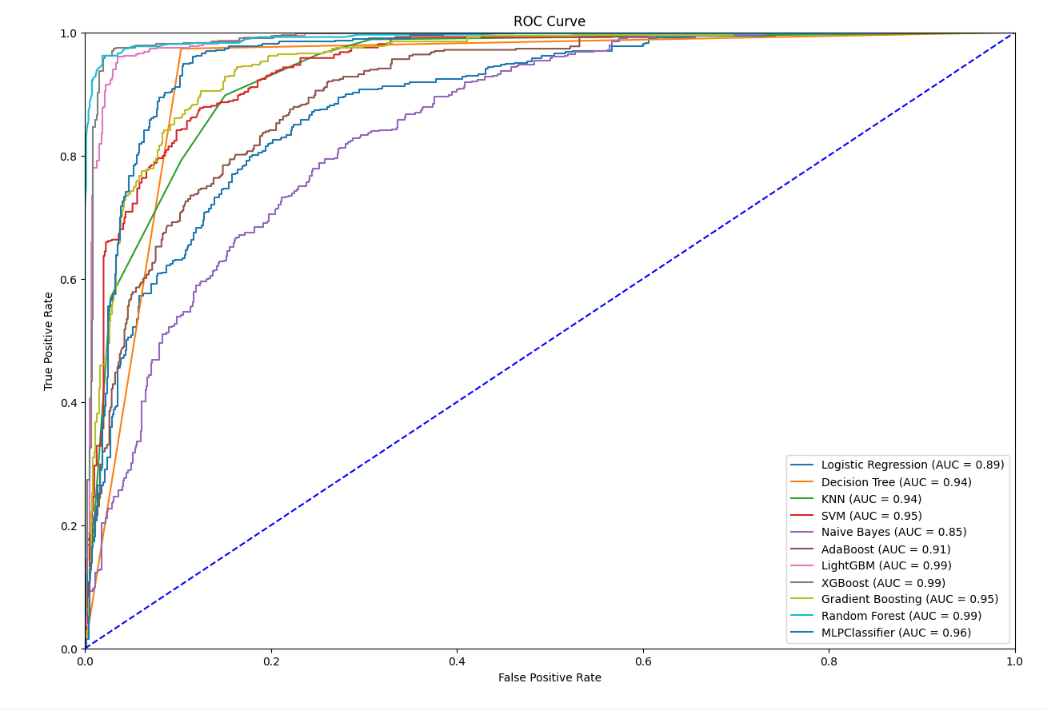


# Best Model selections :   
#Random Forrest Classifier


#First best model :

Model:  RandomForestClassifier()
Accuracy:  0.963963963963964
ROC_AUC:  0.9655968756106001
Cohen_Kappa:  0.925225775214197
Precision:  0.9380692167577414
Recall:  0.9735349716446124
F1:  0.9554730983302412
Training Completed
Time taken:  0.6655216217041016


#This model has the highest accuracy (0.96)

#ROC_AUC (0.965)


In [ ]:
#Save model
import joblib
joblib.dump(RFC_model,'Best_model_RFC.pkl')



